In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
df = pd.read_csv('tips.csv')
df 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.head(10) # loads first 10 entries 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
df.tail() # loads the last 5 entries 

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [9]:
# information about the dataset
df.info() # class, range index, number of columns, data-types of the columns, any missing values (null-null)

# data type 'object' seems like they are strings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
# checking for missing values 
df.isnull()
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
# know the mean, countn std, min, max
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [23]:
# show the total bill, tip, size for each day
df.groupby(['day']).sum()


/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/3436027565.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['day']).sum()


,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [21]:
# correlation between all these variables

correlation_table = df.corr() # 1 is highest (highly correlated) and 0 is lowest
correlation_table

/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/3892145412.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = df.corr() # 1 is highest (highly correlated) and 0 is lowest


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/2273529854.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # annot = annotation


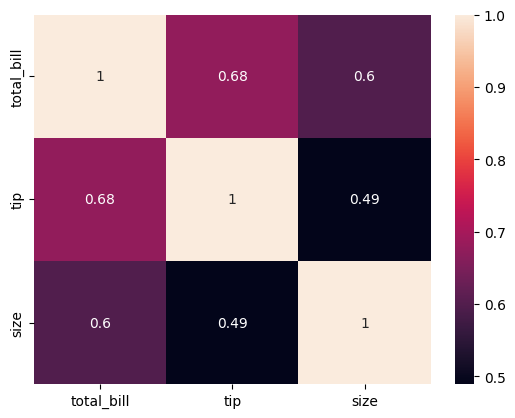

<Figure size 1000x1000 with 0 Axes>

In [25]:
# table to show the correlation listed above
sns.heatmap(df.corr(), annot=True) # annot = annotation
plt.figure(figsize=(10,10)) #what size to make the figure (graph)
plt.show()

Text(0.5, 1.0, 'Number of Females vs Males that come in each day')

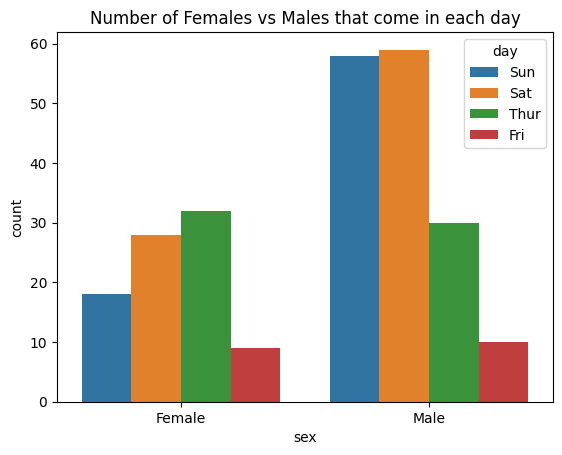

In [40]:
# total count of male & female each day 
sns.countplot(x = 'sex', data = df, hue = 'day') 
plt.title("Number of Females vs Males that come in each day")

Text(0.5, 1.0, 'Box Plot for Tips')

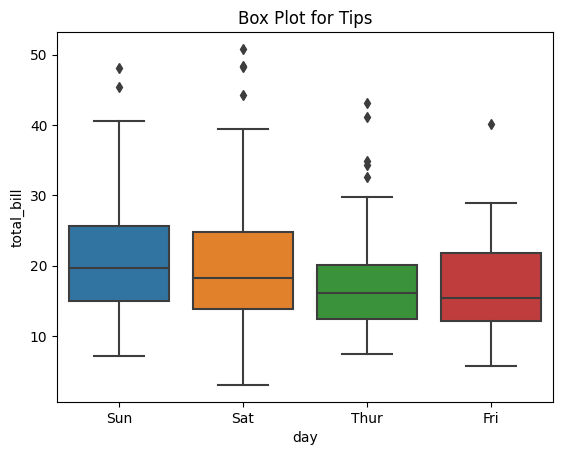

In [42]:
# box plot to find the outliers
sns.boxplot(x = 'day', y = 'total_bill', data = df)
plt.title("Box Plot for Tips")


In [47]:
tipDayPercentage = 100 * df.groupby(['day']).sum()['tip'] / df.groupby(['day']).sum()['total_bill']
print(tipDayPercentage)

# group by day and sum rows by day
day_sum = df.groupby(['day']).sum()
print(day_sum)

# same above but isolate the tip column 
tip_only = df.groupby(['day']).sum()['tip']
print(tip_only)

# same above but isolate the total_bill column
bill_only = df.groupby(['day']).sum()['total_bill']
print(bill_only)

day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
dtype: float64
      total_bill     tip  size
day                           
Fri       325.88   51.96    40
Sat      1778.40  260.40   219
Sun      1627.16  247.39   216
Thur     1096.33  171.83   152
day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64
day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64


/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/1063210681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipDayPercentage = 100 * df.groupby(['day']).sum()['tip'] / df.groupby(['day']).sum()['total_bill']
/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/1063210681.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tipDayPercentage = 100 * df.groupby(['day']).sum()['tip'] / df.groupby(['day']).sum()['total_bill']
/var/folders/x7/4frtg_jx34g69lycmb25nq5m0000gn/T/ipykernel_47514/1063210681.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is de